# 2 - Model Analysis

This notebook analysis selected model performance.

Creation date: 07.09.2017

In [1]:
import joblib
import torch as pt
from torch.autograd import Variable

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
font = {'family' : 'serif',
        'weight' : 'medium',
        'size'   : 14}

plt.rc('font', **font)
plt.rcParams['axes.facecolor'] = 'white'

Loading Data

In [3]:
X_train = joblib.load("preprocessed_data/X_train.p")
X_val = joblib.load("preprocessed_data/X_val.p")
X_test = joblib.load("preprocessed_data/X_test.p")
y_train = joblib.load("preprocessed_data/y_train.p")
y_val = joblib.load("preprocessed_data/y_val.p")
y_test = joblib.load("preprocessed_data/y_test.p")
                                                                                                                                                                                                                   
X_train = pt.from_numpy(X_train.astype("float32"))
y_train = pt.from_numpy(y_train.astype("float32"))
X_val = pt.from_numpy(X_val.astype("float32"))
y_val = pt.from_numpy(y_val.astype("float32"))
X_test = pt.from_numpy(X_test.astype("float32"))
y_test = pt.from_numpy(y_test.astype("float32"))

X = pt.cat((X_train, X_val, X_test))
y = pt.cat((y_train, y_val, y_test))

In [4]:
model = pt.load("./trained_models/model_8.p")
print(model)

MLP (
  (layer_1): Sequential (
    (0): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True)
    (1): Linear (30 -> 100)
    (2): Dropout (p = 0.2)
    (3): ReLU ()
  )
  (layer_2): Sequential (
    (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (1): Linear (100 -> 50)
    (2): Dropout (p = 0.2)
    (3): ReLU ()
  )
  (layer_3): Sequential (
    (0): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True)
    (1): Linear (50 -> 15)
    (2): Dropout (p = 0.2)
    (3): ReLU ()
  )
  (layer_4): Sequential (
    (0): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True)
    (1): Linear (15 -> 1)
    (2): Sigmoid ()
  )
)


/home/arosa/.virtualenvs/ml/lib/python3.5/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'mlp.MLP' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
def predict(model, X):
    return model(Variable(X)).data.squeeze()

<IPython.core.display.Javascript object>


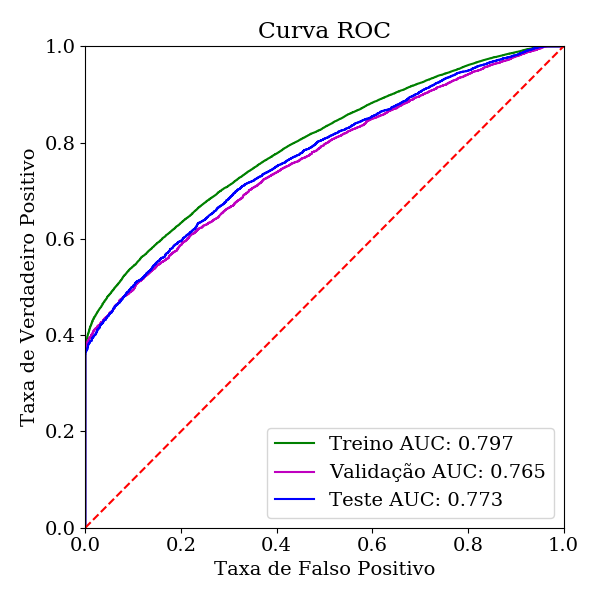

In [6]:
plt.figure(figsize=(6,6))
fpr, tpr, thresh = roc_curve(y_train.numpy(), predict(model, X_train).numpy())
roc_auc = auc(fpr, tpr)

val_fpr, val_tpr, thresh = roc_curve(y_val.numpy(), predict(model, X_val).numpy())
val_roc_auc = auc(val_fpr, val_tpr)

test_fpr, test_tpr, thresh = roc_curve(y_test.numpy(), predict(model, X_test).numpy())
test_roc_auc = auc(test_fpr, test_tpr)

plt.title('Curva ROC')
plt.plot(fpr, tpr, 'g', label="Treino AUC: {:.3f}".format(roc_auc))
plt.plot(val_fpr, val_tpr, 'm', label="Validação AUC: {:.3f}".format(val_roc_auc))
plt.plot(test_fpr, test_tpr, 'b', label="Teste AUC: {:.3f}".format(test_roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


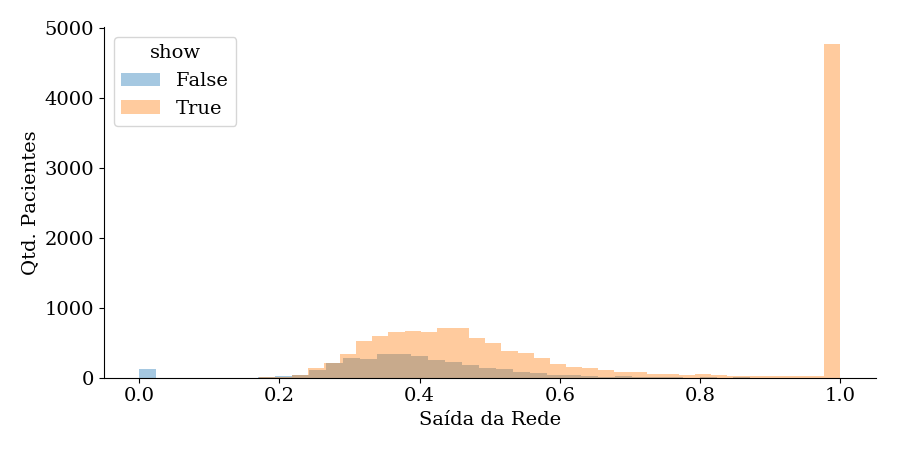

In [17]:
y_prob = predict(model, X_test).numpy()
prob_dist = pd.DataFrame({"prob": y_prob, "label": y_test.numpy().astype("bool")})
ax = sns.FacetGrid(prob_dist, hue="label", size=4.5, aspect=2)

ax = ax.map(sns.distplot, "prob", bins=40, kde=False)
plt.legend(title="show")
plt.xlabel("Saída da Rede")
plt.ylabel("Qtd. Pacientes")
plt.tight_layout()
plt.show()

In [13]:
y_pred = predict(model, X)

loss = (y_pred - y)
mse_loss = pt.pow((y_pred - y), 2)
bce_loss = (y * pt.log(y_pred)) + ((1-y) * pt.log(1 - y_pred))

<IPython.core.display.Javascript object>


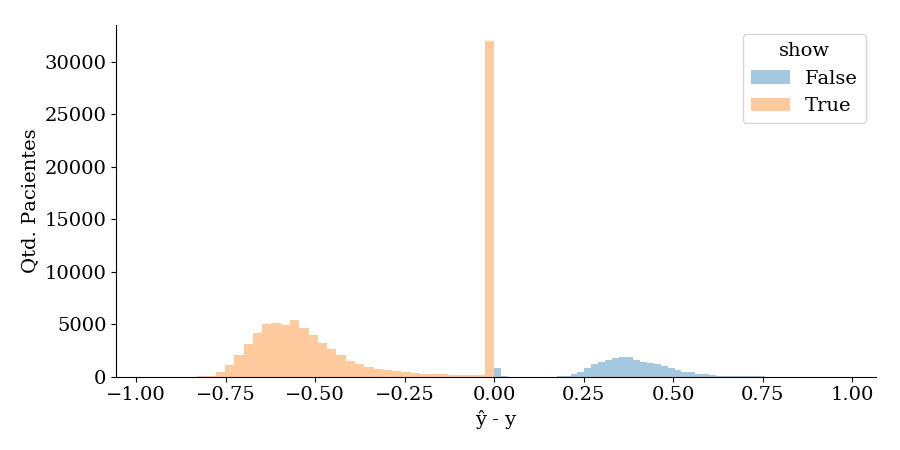

In [18]:
prob_dist = pd.DataFrame({"error": loss.numpy(), "label": y.numpy().astype("bool")})
ax = sns.FacetGrid(prob_dist, hue="label", size=4.5, aspect=2)
ax = ax.map(sns.distplot, "error", bins=None, kde=False)
plt.legend(title="show")
plt.xlabel("ŷ - y")
plt.ylabel("Qtd. Pacientes")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


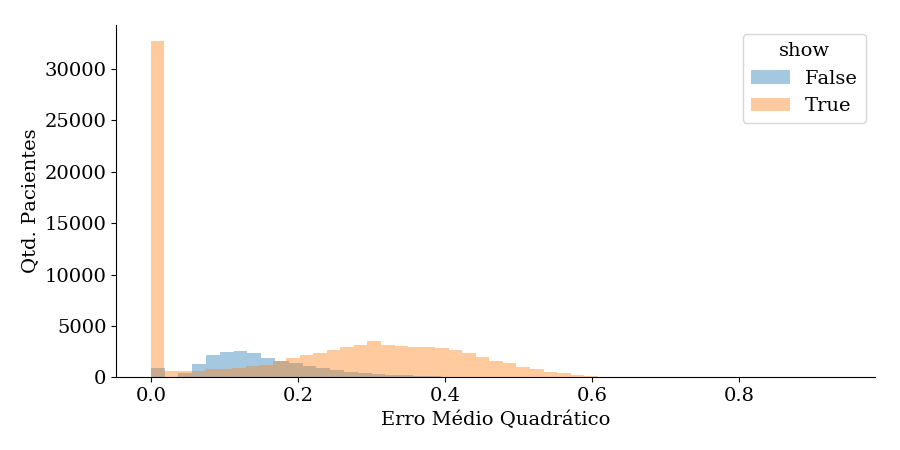

In [19]:
prob_dist = pd.DataFrame({"error": mse_loss.numpy(), "label": y.numpy().astype("bool")})
ax = sns.FacetGrid(prob_dist, hue="label", size=4.5, aspect=2)
ax = ax.map(sns.distplot, "error", bins=None, kde=False)
plt.legend(title="show")
plt.xlabel("Erro Médio Quadrático")
plt.ylabel("Qtd. Pacientes")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


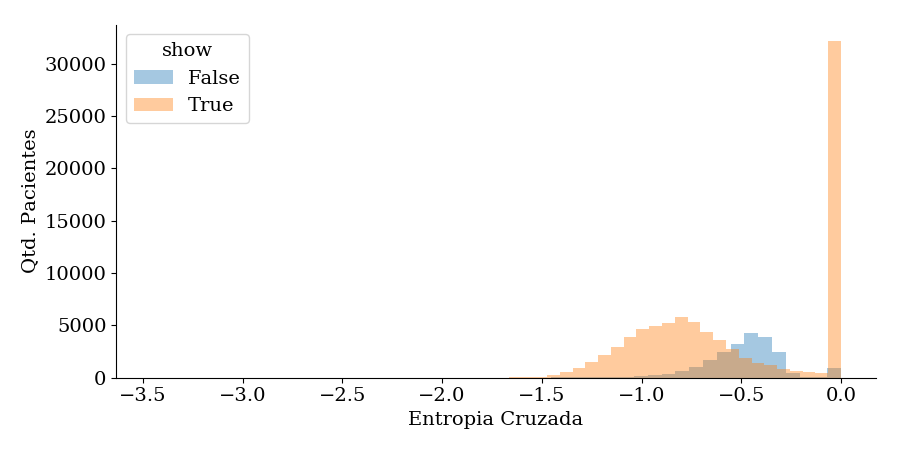

In [20]:
prob_dist = pd.DataFrame({"error": bce_loss.numpy(), "label": y.numpy().astype("bool")})
ax = sns.FacetGrid(prob_dist, hue="label", size=4.5, aspect=2)
ax = ax.map(sns.distplot, "error", bins=None, kde=False)
plt.legend(title="show")
plt.xlabel("Entropia Cruzada")
plt.ylabel("Qtd. Pacientes")
plt.tight_layout()
plt.show()

In [12]:
y_pred = predict(model, X)

loss = (y_pred - y)
mse_loss = pt.pow((y_pred - y), 2)
bce_loss = (y * pt.log(y_pred)) + ((1-y) * pt.log(1 - y_pred))

loss_nonzero = (loss.abs() > 0.02)

<IPython.core.display.Javascript object>


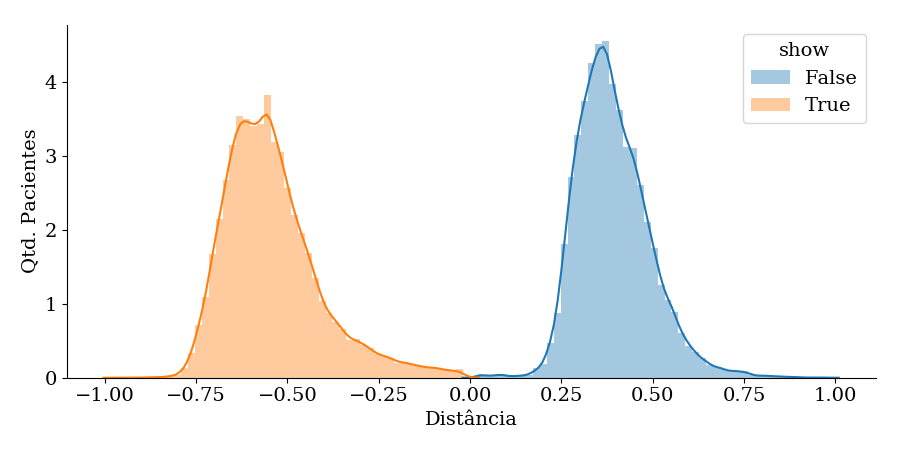

In [13]:
prob_dist = pd.DataFrame({"error": loss[loss_nonzero].numpy(), "label": y[loss_nonzero].numpy().astype("bool")})
ax = sns.FacetGrid(prob_dist, hue="label", size=4.5, aspect=2)
ax = ax.map(sns.distplot, "error", bins=None, kde=True)
plt.legend(title="show")
plt.xlabel("Distância")
plt.ylabel("Qtd. Pacientes")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


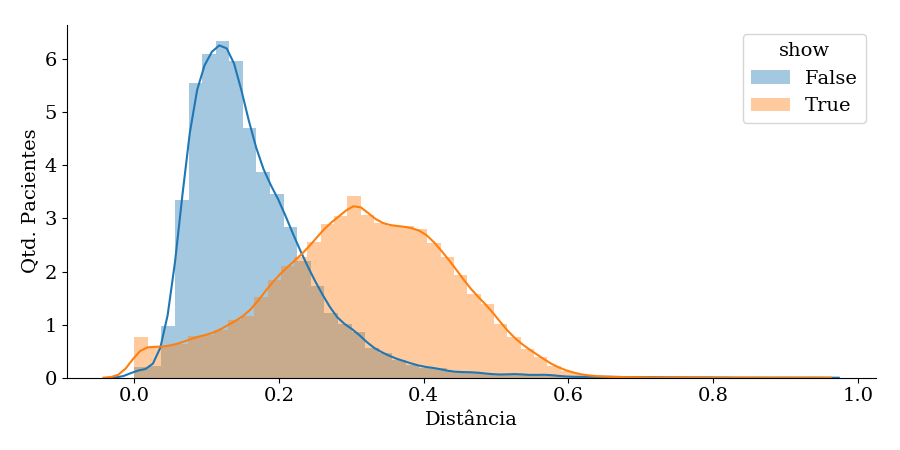

In [14]:
prob_dist = pd.DataFrame({"error": mse_loss[loss_nonzero].numpy(), "label": y[loss_nonzero].numpy().astype("bool")})
ax = sns.FacetGrid(prob_dist, hue="label", size=4.5, aspect=2)
ax = ax.map(sns.distplot, "error", bins=None, kde=True)
plt.legend(title="show")
plt.xlabel("Distância")
plt.ylabel("Qtd. Pacientes")
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


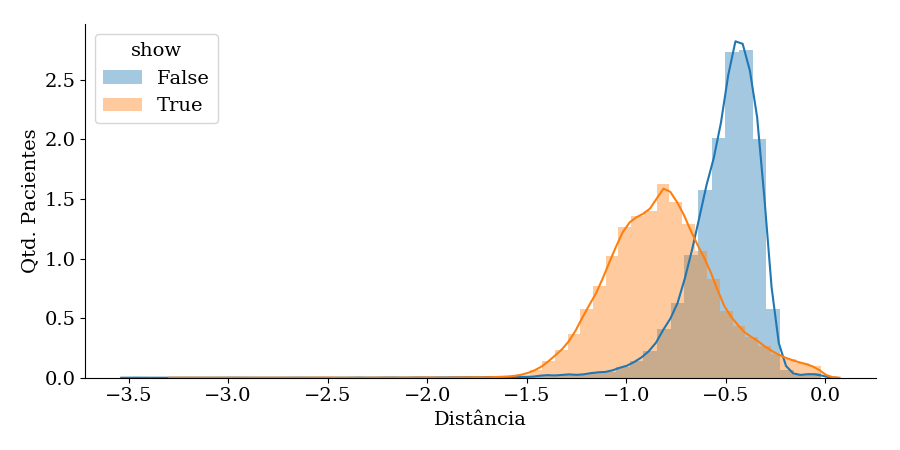

In [15]:
prob_dist = pd.DataFrame({"error": bce_loss[loss_nonzero].numpy(), "label": y[loss_nonzero].numpy().astype("bool")})
ax = sns.FacetGrid(prob_dist, hue="label", size=4.5, aspect=2)
ax = ax.map(sns.distplot, "error", bins=None, kde=True)
plt.legend(title="show")
plt.xlabel("Distância")
plt.ylabel("Qtd. Pacientes")
plt.tight_layout()
plt.show()